<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/6_2_Machine_Learning_with_Tree_Based_Models_in_Python_The_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-2 Machine Learning with Tree-Based Models in Python - The Bias-Variance Tradeoff.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('ggplot')

## Data

In [3]:
base_url = 'https://drive.google.com/uc?id='

### Auto-mpg Dataset

In [4]:
id = '14qqT73DvmgD0dx9zkcs3pxRLMCwSANii'
auto = pd.read_csv(base_url + id)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


## Generalization Error

### Supervised Learning - Under the Hood

- Supervised Learning: $y = f(x)$, $f$ is unknown
- In reality, data generation is always accompanied by randomness or noise like the blue points shown below
- Your goal is to find a model that best approximates $f: \widehat{f} \approx f$
- When training $\widehat{f}$, you want to make sure that noise is discarded as much as possible
- $\widehat{f}$ can be Logistic Regression, Decision Tree, Neural Network, ...
- **End goal**: $\widehat{f}$ should achieve a low predictive error on unseen datasets

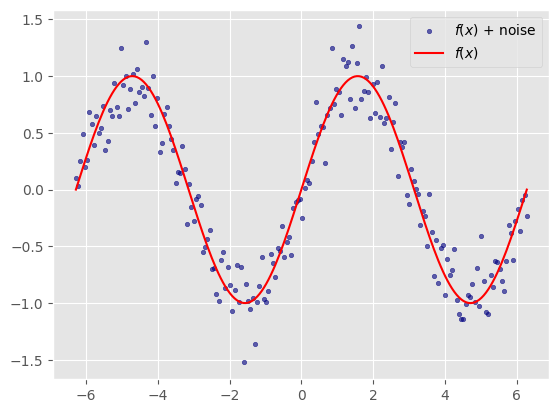

In [5]:
# create evenly spaced X values
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)

# create y values using sine and add noise
rng = np.random.RandomState(42)
y = np.sin(x) + rng.normal(scale=0.2, size=len(x))

# plot noisy data
plt.scatter(x, y, alpha=0.6, color='navy', s=10, label='$f(x)$ + noise')
# plot sine curve
plt.plot(x, np.sin(x), color='red', label='$f(x)$')

plt.legend()
plt.show()

- Fitting a `DecisionTreeRegressor` to the data in order to explore **bias vs variance**

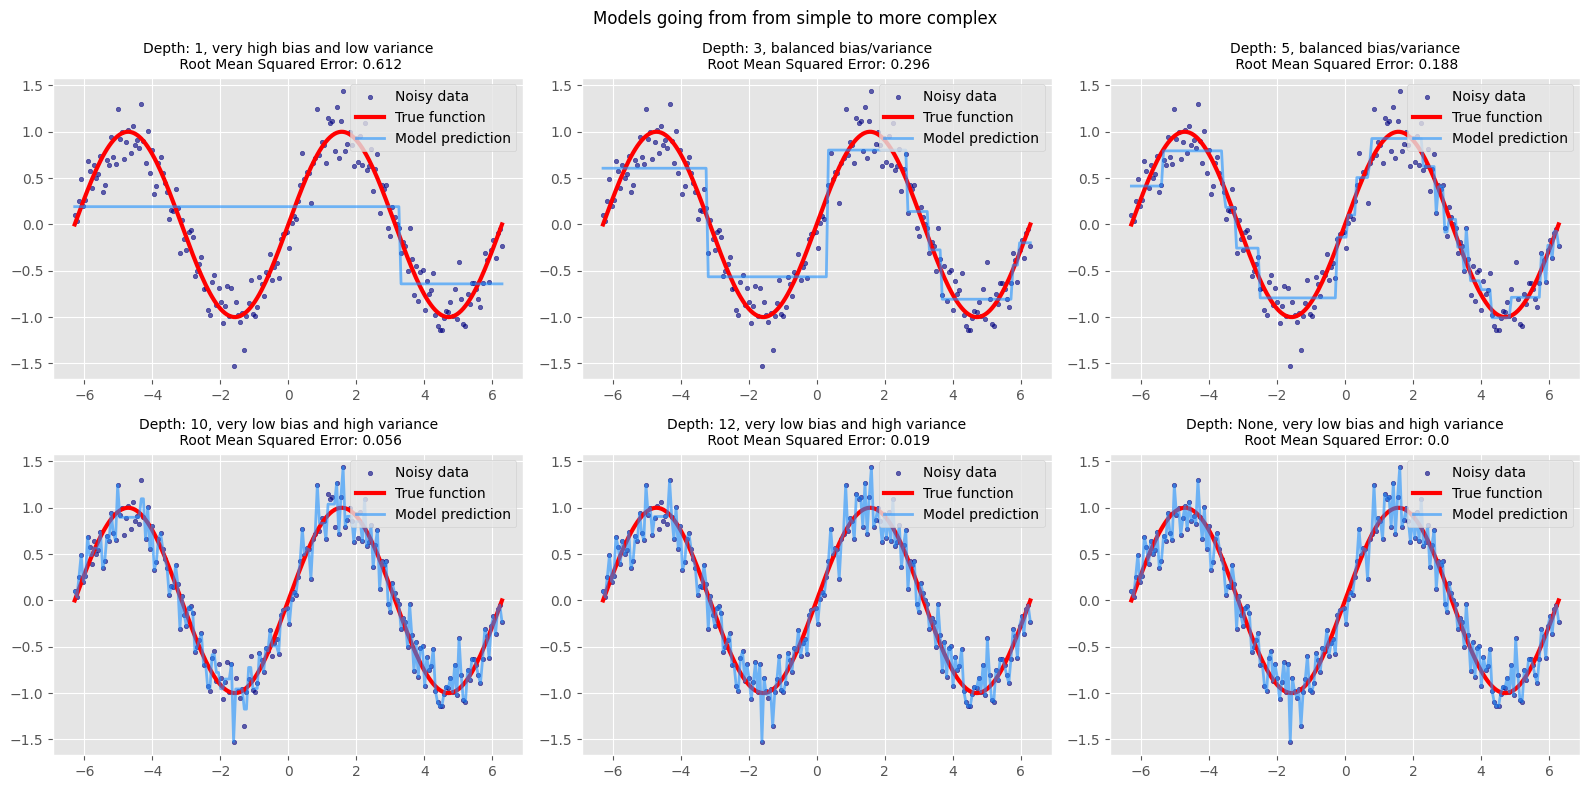

In [6]:
# reshape for sklearn
X = x.reshape(-1, 1)

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

descr = ['very high bias and low variance', 'balanced bias/variance', 'balanced bias/variance',
         'very low bias and high variance', 'very low bias and high variance', 'very low bias and high variance']
for i, depth in enumerate([1, 3, 5, 10, 12, None]):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X, y)
    y_pred = tree.predict(X)
    rmse = root_mean_squared_error(y, y_pred)

    axes[i].scatter(x, y, alpha=0.6, color='navy', s=10, label='Noisy data')
    axes[i].plot(x, np.sin(x), color='red', linewidth=3, label='True function')
    axes[i].plot(x, y_pred, color='dodgerblue', linewidth=2, alpha=0.6, label='Model prediction')
    axes[i].legend(loc='upper right')
    axes[i].set_title(f'Depth: {depth}, {descr[i]}\n Root Mean Squared Error: {np.round(rmse, 3)}', fontsize=10)

plt.suptitle('Models going from from simple to more complex')

plt.tight_layout()
plt.show()

### Difficulties in Approximating $f$

- **Overfitting**: $\widehat{f}(x)$ fits the training set noise
- **Underfitting**: $\widehat{f}$ is not flexible enough to approximate $f$


### Overfitting

- When a model overfits the training set, it's predictive power on unseen datasets is pretty low
- Such a model achieves a low training set error and a high test set error

<img src='https://drive.google.com/uc?export=view&id=1m41woAhaxsyz3uOF0Fj2_WHrcyrsJxzY'>

### Underfitting

- When a model undefits the data, the training set error is roughly equal to the test set error, however, both errors are relatively high
- The trained model isn't flexible enough to caputre the complex dependency between features and labels

<img src='https://drive.google.com/uc?export=view&id=1T-ofMEz_uqQXi3M2k6Qb__x5OY1T1fw5'>



### Generalization Error

- **Generalization Error** of $\widehat{f}$: Does $\widehat{f}$ generalize well on unseen data?
- It can be decomposed as follows:

$$
\text{Generalization Error of }\widehat{f} = bias^{2} + variance + \text{irreducible error}
$$

- **irreducible error** is the error contribution of noise

#### Bias

- **bias**: error term that tells you, on average, how much $\widehat{f} \ne f$
- The following model is not flexible enough to approximate the true function $f$ shown in red
- High bias leads to underfitting

<img src='https://drive.google.com/uc?export=view&id=1CIPdKL27sDmoLqbG09WDhvU44pkM9S1e'>

#### Variance

- **variance**: tells you how much $\widehat{f}$ is inconsistent over different training sets
- Consider the hight variance model shown here in black, in this case, $\widehat{f}$ follows the training data points so closely that it misses the true function, $f$, shown in red
- High variance leads to overfitting

<img src='https://drive.google.com/uc?export=view&id=1VFMDZMEMFoVZron6XhcbbfCOFzEHcr0M'>



### Model Complexity

- **Model complexity**: sets the flexibility of $\widehat{f}$ to approximate the true function, $f$.
- Example: Maximum tree depath, Minimum samples per leaf

### Bias-Variance Tradeoff

- The following diagram shows how the best model complexity corresponds to the lowest generalization error
- model complexity increases $\rightarrow$ variance increases and bias decreases
- model complexity decraeases $\rightarrow$ variance decreases and bias increases
- **goal**: find the model complexity that achieves the lowest generalization error
- the **irreducible error** remains constant, so it does not factor into the equation

<img src='https://drive.google.com/uc?export=view&id=1AFOiU0GRt1nElM6XffpbqCI9XAmpES17'>

### Bias-Variance Tradeoff: A Visual Explanation

- Imagine approximating $\widehat{f}$ as aiming at the centre of a shooting target, where the centre is the true function $f$

<img src='https://drive.google.com/uc?export=view&id=1JUGqx1NHQWxOsWFbaZYkVtjXLaNifDVb'>



## Diagnosing Bias and Variance Problems